In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Loading the weather data set

In [ ]:
data=pd.read_csv("/content/seattle-weather.csv")
print(data.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [ ]:
print(data.describe())

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [ ]:
figure=px.line(data, x="date",
               y="wind" ,
               title="Wind")
figure.show()

In [ ]:
figure=px.line(data, x="date",
               y="precipitation" ,
               title="Precipitation")
figure.show()

In [ ]:
figure=px.line(data, x="date",
               y="temp_max" ,
               title="Maximum Temperature")
figure.show()

In [ ]:
figure=px.line(data, x="date",
               y="temp_min" ,
               title="Minimum Temperature")
figure.show()

In [ ]:
figure=px.line(data, x="date",
               y="weather" ,
               title="Weather")
figure.show()

In [ ]:
figure=px.line(data, x="temp_min",
               y="temp_max" ,
               title="Relationship between Temperature minimum and maximum")
figure.show()

In [ ]:
figure=px.line(data, x="precipitation",
               y="wind" ,
               title="Relationship between Wind and Precipitation")
figure.show()

In [ ]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date  precipitation  temp_max  temp_min  wind  weather  year  month
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle  2012      1
1 2012-01-02           10.9      10.6       2.8   4.5     rain  2012      1
2 2012-01-03            0.8      11.7       7.2   2.3     rain  2012      1
3 2012-01-04           20.3      12.2       5.6   4.7     rain  2012      1
4 2012-01-05            1.3       8.9       2.8   6.1     rain  2012      1


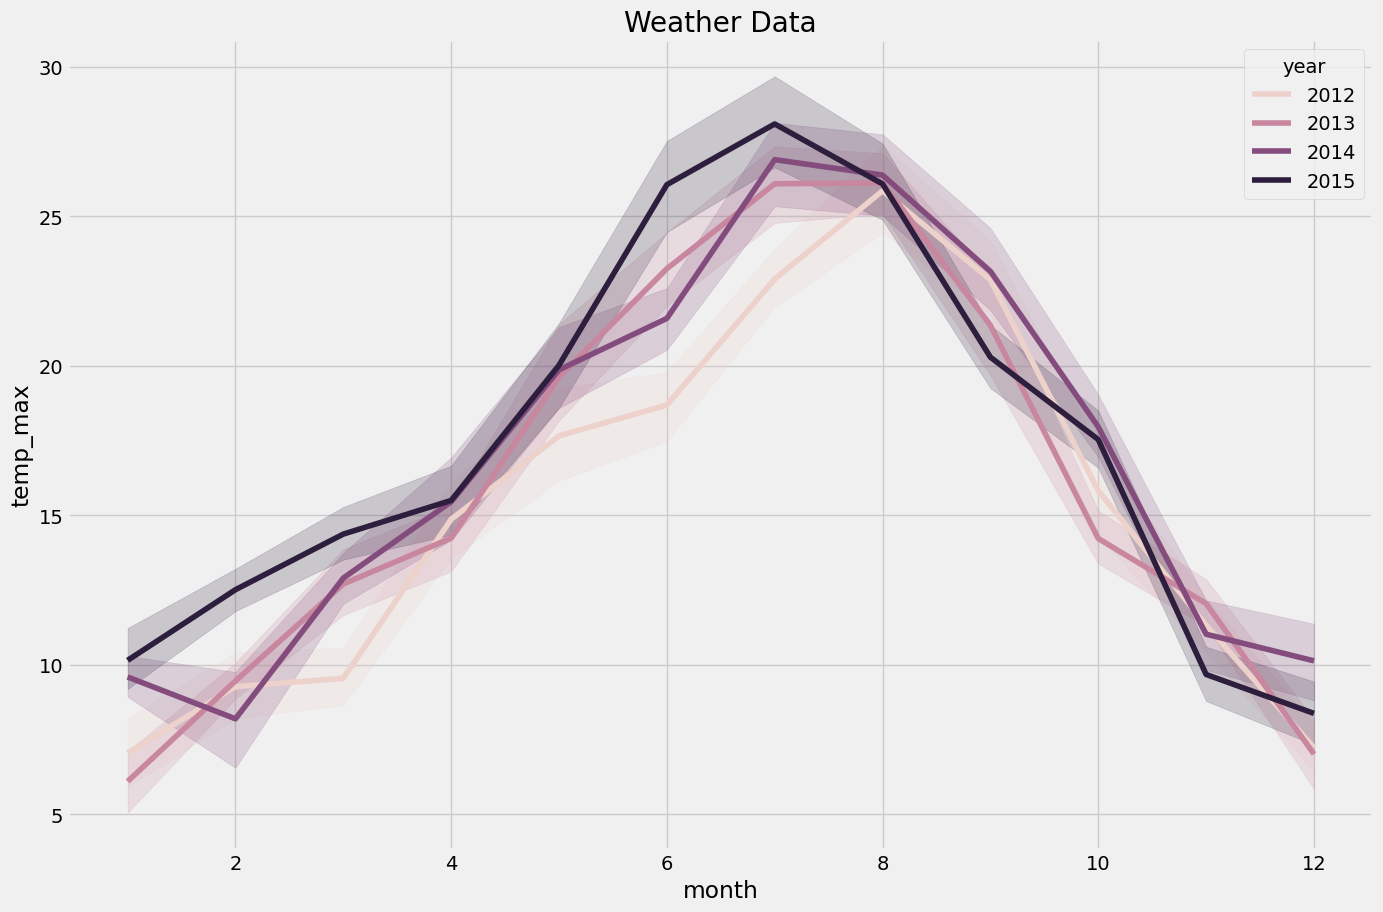

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Weather Data")
sns.lineplot(data = data, x='month', y='temp_max', hue='year')
plt.show()

In [ ]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "temp_min": "y"})
print(forecast_data)

             ds  precipitation  temp_max    y  wind  weather  year  month
0    2012-01-01            0.0      12.8  5.0   4.7  drizzle  2012      1
1    2012-01-02           10.9      10.6  2.8   4.5     rain  2012      1
2    2012-01-03            0.8      11.7  7.2   2.3     rain  2012      1
3    2012-01-04           20.3      12.2  5.6   4.7     rain  2012      1
4    2012-01-05            1.3       8.9  2.8   6.1     rain  2012      1
...         ...            ...       ...  ...   ...      ...   ...    ...
1456 2015-12-27            8.6       4.4  1.7   2.9     rain  2015     12
1457 2015-12-28            1.5       5.0  1.7   1.3     rain  2015     12
1458 2015-12-29            0.0       7.2  0.6   2.6      fog  2015     12
1459 2015-12-30            0.0       5.6 -1.0   3.4      sun  2015     12
1460 2015-12-31            0.0       5.6 -2.1   3.5      sun  2015     12

[1461 rows x 8 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)

print(predictions)

plot_plotly(model,predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedmjzjgo/wnodiufg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedmjzjgo/1whx6bp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87940', 'data', 'file=/tmp/tmpedmjzjgo/wnodiufg.json', 'init=/tmp/tmpedmjzjgo/1whx6bp4.json', 'output', 'file=/tmp/tmpedmjzjgo/prophet_model196n9gh3/prophet_model-20240107053327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2012-01-01  6.868045   -2.222887    3.925222     6.868045     6.868045   
1    2012-01-02  6.870444   -2.223765    3.932697     6.870444     6.870444   
2    2012-01-03  6.872843   -2.214807    4.224107     6.872843     6.872843   
3    2012-01-04  6.875242   -2.458614    3.605102     6.875242     6.875242   
4    2012-01-05  6.877642   -2.380695    3.988821     6.877642     6.877642   
...         ...       ...         ...         ...          ...          ...   
1821 2016-12-26  7.806871   -0.798514    5.562257     7.665060     7.952969   
1822 2016-12-27  7.805095   -0.926172    5.382425     7.663450     7.951938   
1823 2016-12-28  7.803320   -1.125272    5.261418     7.660689     7.950767   
1824 2016-12-29  7.801544   -1.120663    5.208457     7.658170     7.949596   
1825 2016-12-30  7.799769   -1.208386    5.466044     7.655803     7.948403   

      additive_terms  additive_terms_lower  additiv

In [ ]:
predictions.to_csv('/content/predicted_weather_prophet.csv', index=False)


In [ ]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "temp_max": "y"})
print(forecast_data)

             ds  precipitation     y  temp_min  wind  weather  year  month
0    2012-01-01            0.0  12.8       5.0   4.7  drizzle  2012      1
1    2012-01-02           10.9  10.6       2.8   4.5     rain  2012      1
2    2012-01-03            0.8  11.7       7.2   2.3     rain  2012      1
3    2012-01-04           20.3  12.2       5.6   4.7     rain  2012      1
4    2012-01-05            1.3   8.9       2.8   6.1     rain  2012      1
...         ...            ...   ...       ...   ...      ...   ...    ...
1456 2015-12-27            8.6   4.4       1.7   2.9     rain  2015     12
1457 2015-12-28            1.5   5.0       1.7   1.3     rain  2015     12
1458 2015-12-29            0.0   7.2       0.6   2.6      fog  2015     12
1459 2015-12-30            0.0   5.6      -1.0   3.4      sun  2015     12
1460 2015-12-31            0.0   5.6      -2.1   3.5      sun  2015     12

[1461 rows x 8 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)

print(predictions)

plot_plotly(model,predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxerlmg_j/zj44w220.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxerlmg_j/ewazwx53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77777', 'data', 'file=/tmp/tmpxerlmg_j/zj44w220.json', 'init=/tmp/tmpxerlmg_j/ewazwx53.json', 'output', 'file=/tmp/tmpxerlmg_j/prophet_modelw21st807/prophet_model-20240107052523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:25:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:25:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2012-01-01  14.751394    1.611670   10.377951    14.751394    14.751394   
1    2012-01-02  14.753920    2.133088   11.091659    14.753920    14.753920   
2    2012-01-03  14.756447    1.570380   10.380103    14.756447    14.756447   
3    2012-01-04  14.758973    1.326988    9.443912    14.758973    14.758973   
4    2012-01-05  14.761500    1.780733   10.150815    14.761500    14.761500   
...         ...        ...         ...         ...          ...          ...   
1821 2016-12-26  14.954903    2.123283   10.864442    14.660847    15.236947   
1822 2016-12-27  14.950624    1.591342   10.099840    14.655308    15.232917   
1823 2016-12-28  14.946346    1.607724   10.316933    14.649769    15.229532   
1824 2016-12-29  14.942067    1.850737   10.496463    14.644300    15.226772   
1825 2016-12-30  14.937788    1.534698   10.371444    14.638838    15.224011   

      additive_terms  additive_terms_lo

In [ ]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "wind": "y"})
print(forecast_data)

             ds  precipitation  temp_max  temp_min    y  weather  year  month
0    2012-01-01            0.0      12.8       5.0  4.7  drizzle  2012      1
1    2012-01-02           10.9      10.6       2.8  4.5     rain  2012      1
2    2012-01-03            0.8      11.7       7.2  2.3     rain  2012      1
3    2012-01-04           20.3      12.2       5.6  4.7     rain  2012      1
4    2012-01-05            1.3       8.9       2.8  6.1     rain  2012      1
...         ...            ...       ...       ...  ...      ...   ...    ...
1456 2015-12-27            8.6       4.4       1.7  2.9     rain  2015     12
1457 2015-12-28            1.5       5.0       1.7  1.3     rain  2015     12
1458 2015-12-29            0.0       7.2       0.6  2.6      fog  2015     12
1459 2015-12-30            0.0       5.6      -1.0  3.4      sun  2015     12
1460 2015-12-31            0.0       5.6      -2.1  3.5      sun  2015     12

[1461 rows x 8 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)

print(predictions)

plot_plotly(model,predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedmjzjgo/6kv_es94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedmjzjgo/wtxmjjgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15501', 'data', 'file=/tmp/tmpedmjzjgo/6kv_es94.json', 'init=/tmp/tmpedmjzjgo/wtxmjjgv.json', 'output', 'file=/tmp/tmpedmjzjgo/prophet_modelp42visrh/prophet_model-20240107053636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:36:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:36:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2012-01-01  3.534893    1.619040    5.158626     3.534893     3.534893   
1    2012-01-02  3.534066    1.670321    5.098692     3.534066     3.534066   
2    2012-01-03  3.533239    1.628585    5.222453     3.533239     3.533239   
3    2012-01-04  3.532412    1.482109    5.102733     3.532412     3.532412   
4    2012-01-05  3.531585    1.425067    4.902502     3.531585     3.531585   
...         ...       ...         ...         ...          ...          ...   
1821 2016-12-26  3.430375    1.657455    5.175640     3.390121     3.469697   
1822 2016-12-27  3.430711    1.669856    5.159406     3.390231     3.470190   
1823 2016-12-28  3.431046    1.542253    4.857742     3.390388     3.470833   
1824 2016-12-29  3.431381    1.546237    4.975059     3.390547     3.471475   
1825 2016-12-30  3.431716    1.618579    5.116460     3.390736     3.472118   

      additive_terms  additive_terms_lower  additiv

In [ ]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "precipitation": "y"})
print(forecast_data)

             ds     y  temp_max  temp_min  wind  weather  year  month
0    2012-01-01   0.0      12.8       5.0   4.7  drizzle  2012      1
1    2012-01-02  10.9      10.6       2.8   4.5     rain  2012      1
2    2012-01-03   0.8      11.7       7.2   2.3     rain  2012      1
3    2012-01-04  20.3      12.2       5.6   4.7     rain  2012      1
4    2012-01-05   1.3       8.9       2.8   6.1     rain  2012      1
...         ...   ...       ...       ...   ...      ...   ...    ...
1456 2015-12-27   8.6       4.4       1.7   2.9     rain  2015     12
1457 2015-12-28   1.5       5.0       1.7   1.3     rain  2015     12
1458 2015-12-29   0.0       7.2       0.6   2.6      fog  2015     12
1459 2015-12-30   0.0       5.6      -1.0   3.4      sun  2015     12
1460 2015-12-31   0.0       5.6      -2.1   3.5      sun  2015     12

[1461 rows x 8 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)

print(predictions)

plot_plotly(model,predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedmjzjgo/csfgsih6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedmjzjgo/r_ghcbci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2769', 'data', 'file=/tmp/tmpedmjzjgo/csfgsih6.json', 'init=/tmp/tmpedmjzjgo/r_ghcbci.json', 'output', 'file=/tmp/tmpedmjzjgo/prophet_modeljlm5oe11/prophet_model-20240107053756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:37:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:37:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2012-01-01  3.152469   -4.953165   11.609153     3.152469     3.152469   
1    2012-01-02  3.152067   -4.724418   11.498814     3.152067     3.152067   
2    2012-01-03  3.151664   -5.142662   11.805462     3.151664     3.151664   
3    2012-01-04  3.151262   -5.139414   11.370552     3.151262     3.151262   
4    2012-01-05  3.150859   -5.333697   11.891142     3.150859     3.150859   
...         ...       ...         ...         ...          ...          ...   
1821 2016-12-26  3.853272   -3.864185   11.928462     3.799021     3.912107   
1822 2016-12-27  3.854514   -3.918195   12.315065     3.800034     3.913689   
1823 2016-12-28  3.855757   -3.232750   12.629269     3.801048     3.915065   
1824 2016-12-29  3.857000   -3.837560   12.946853     3.802059     3.916617   
1825 2016-12-30  3.858242   -3.893496   12.814975     3.803037     3.918181   

      additive_terms  additive_terms_lower  additiv

Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   year           1461 non-null   int64         
 7   month          1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 91.4+ KB


In [ ]:
x = data[['temp_min', 'temp_max', 'precipitation', 'wind']]
y=data['weather']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]
Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       1.00      0.00      0.00        25
        rain       0.96      0.91      0.94       120
        snow       0.57      0.50      0.53         8
         sun       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.66      0.48      0.47       293
weighted avg       0.84      0.83      0.78       293

